In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

In [ ]:
seed_everything(config.seed)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Future_Problem/total_data.csv')

재무데이터만

In [ ]:
df1 = df[['마감일', '매출액', '매출원가', '판매비와관리비', '영업이익', '재고자산회전율', '유동비율', '당좌비율',
       '당기순이익', '수요예측지표', '세전이익대비_비용비율', '부채비율', '자본회전율', '현금비율', '순운전자본',
       '부채총계대매출액', '명목GDP', 'GDP성장률', 'year', '생산량(천대)', '내수(천대)', '수출(억불)',
       '수입(억불)', '분기', 'Model', '판매량', '차종', '가격', '판매액', '차량별 매출액 기여도',
       '차량별 매출원가 기여도', '차량별 영업이익 기여도', '차량별 판관비 기여도','target']].copy()

In [ ]:
df1.columns

Index(['마감일', '매출액', '매출원가', '판매비와관리비', '영업이익', '재고자산회전율', '유동비율', '당좌비율',
       '당기순이익', '수요예측지표', '세전이익대비_비용비율', '부채비율', '자본회전율', '현금비율', '순운전자본',
       '부채총계대매출액', '명목GDP', 'GDP성장률', 'year', '생산량(천대)', '내수(천대)', '수출(억불)',
       '수입(억불)', '분기', 'Model', '판매량', '차종', '가격', '판매액', '차량별 매출액 기여도',
       '차량별 매출원가 기여도', '차량별 영업이익 기여도', '차량별 판관비 기여도', 'target'],
      dtype='object')

In [ ]:
df1.head(3)

,마감일,매출액,매출원가,판매비와관리비,영업이익,재고자산회전율,유동비율,당좌비율,당기순이익,수요예측지표,...,Model,판매량,차종,가격,판매액,차량별 매출액 기여도,차량별 매출원가 기여도,차량별 영업이익 기여도,차량별 판관비 기여도,target
0,2023-03-31,37778693000000,30056680000000,4129314000000,3592699000000,2.250297,1.325627,1.106406,-3293248000000,-0.195916,...,2023_1분기_그랜저,16400.0,그랜저,37430000,6.138520e+11,0.016249,0.020423,0.170861,0.148657,1
1,2023-06-30,42249695000000,33356309000000,4655455000000,4237931000000,2.426441,1.337885,1.107824,-3603870000000,-0.206938,...,2023_2분기_그랜저,13514.0,그랜저,37430000,5.058290e+11,0.011972,0.015164,0.119358,0.108653,1
2,2023-09-30,41002663000000,32541305000000,4639559000000,3821799000000,2.280985,1.377631,1.132773,-3017161000000,-0.167845,...,2023_3분기_그랜저,10410.0,그랜저,37430000,3.896463e+11,0.009503,0.011974,0.101954,0.083983,1


In [ ]:
df1.describe()

,매출액,매출원가,판매비와관리비,영업이익,재고자산회전율,유동비율,당좌비율,당기순이익,수요예측지표,세전이익대비_비용비율,...,수입(억불),분기,판매량,가격,판매액,차량별 매출액 기여도,차량별 매출원가 기여도,차량별 영업이익 기여도,차량별 판관비 기여도,target
count,8.330000e+02,8.330000e+02,8.330000e+02,8.330000e+02,833.000000,833.000000,833.000000,8.330000e+02,833.000000,833.000000,...,833.000000,833.000000,833.000000,8.330000e+02,8.330000e+02,833.000000,833.000000,833.000000,833.000000,833.000000
mean,2.743754e+13,2.242216e+13,3.690942e+12,1.324436e+12,2.189686,1.471276,1.250921,-1.380092e+12,-0.103862,0.852924,...,112.659064,20200.848739,6699.199760,3.729439e+07,2.257580e+11,0.008967,0.010846,-0.233233,0.068876,0.469388
std,7.140718e+12,5.373972e+12,1.051910e+12,1.538053e+12,0.363927,0.134119,0.115535,1.299086e+12,0.092197,0.350583,...,45.771067,22.160010,7044.120039,1.863234e+07,2.374157e+11,0.010287,0.012322,3.344941,0.083069,0.499362
min,1.360672e+13,1.220693e+13,1.181388e+12,-2.754618e+12,1.168396,1.298409,1.105899,-3.603870e+12,-0.260044,0.521116,...,0.000000,20161.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-51.426449,0.000000,0.000000
25%,2.243656e+13,1.830261e+13,3.087791e+12,5.903210e+11,2.093959,1.377631,1.142328,-1.853323e+12,-0.161193,0.707802,...,109.000000,20182.000000,1117.000000,2.466000e+07,3.144790e+10,0.001029,0.001303,0.005740,0.008261,0.000000
50%,2.531945e+13,2.105414e+13,3.403603e+12,1.342391e+12,2.234168,1.427069,1.216838,-1.412890e+12,-0.128692,0.762586,...,121.000000,20203.000000,3643.000000,3.213000e+07,1.575118e+11,0.005368,0.006473,0.050399,0.041765,0.000000
75%,3.032607e+13,2.459480e+13,4.420510e+12,1.928930e+12,2.426441,1.612084,1.375069,-8.425540e+11,-0.074723,0.793268,...,142.500000,20222.000000,10894.000000,4.347000e+07,3.520390e+11,0.013334,0.016033,0.235829,0.102143,1.000000
max,4.224970e+13,3.335631e+13,5.805372e+12,4.237931e+12,2.676846,1.751399,1.477575,1.704323e+12,0.146442,2.324199,...,153.700000,20233.000000,34248.000000,9.445000e+07,1.281903e+12,0.065875,0.073429,4.104009,0.758718,1.000000


In [ ]:
df1.drop(['생산량(천대)','내수(천대)','수출(억불)','수입(억불)','분기'], axis=1, inplace=True)

In [ ]:
df1.drop(['year'], axis=1, inplace=True)

In [ ]:
# # '대기기간' 열의 값 변환 함수 정의
# def convert_duration(duration_str):
#     if '주' in duration_str:
#         # '주'가 포함된 경우 숫자 * 7 반환
#         return float(duration_str.replace('주', '')) * 7
#     elif '개월' in duration_str:
#         # '개월'이 포함된 경우 숫자 * 30 반환
#         return float(duration_str.replace('개월', '')) * 30
#     else:
#         # 다른 경우는 그대로 반환
#         return float(duration_str)

# # '대기기간' 열에 함수 적용하여 새로운 열 생성
# df2['변환된기간'] = df2['대기기간'].apply(convert_duration)

In [ ]:
# # 변환된 기간이 45를 초과하는지 여부에 따라 1 또는 0 반환하는 함수 정의
# def is_above_threshold(duration):
#     return 1 if duration > 45 else 0
# df2['target'] = df2['변환된기간'].apply(is_above_threshold)

<Axes: >

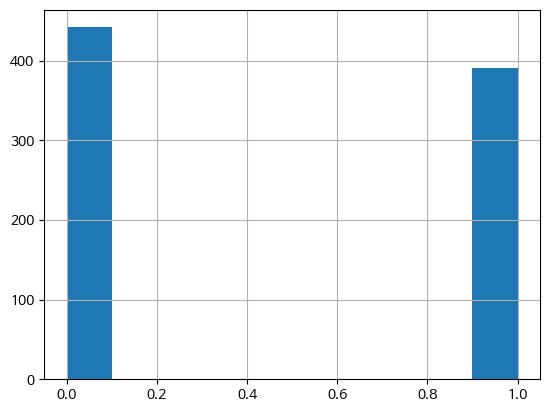

In [ ]:
df1['target'].hist() #이 둘의 밸런스는 맞음

인코딩 (원핫인코딩)

In [ ]:
target = df1['target']
feature = df1.drop(['target','마감일','Model'],axis=1)#우선 필요없다고 판단되는 칼럼삭제, 마감일의 경우 다른 분석에는 필요할지 논의 필

In [ ]:
feature['명목GDP'] = feature['명목GDP'].str.replace(',', '').astype(float)

In [ ]:
feature_en = pd.get_dummies(feature)

정규화

In [ ]:
import sklearn
from sklearn.preprocessing import *

feature_sc=StandardScaler().fit_transform(feature_en)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(feature_sc, target, test_size = 0.2, random_state = 0)

로지스틱회귀

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
score1 = model.predict_proba(X_test)[:, 1]

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('roc auc score = ', roc_auc_score(Y_test, score1))

confusion matrix = 
 [[81 15]
 [10 61]]
accuracy =  0.8502994011976048
precision =  0.8026315789473685
recall =  0.8591549295774648
f1 score =  0.8299319727891157
roc auc score =  0.902288732394366


In [ ]:
# Calculate the weights of each feature
weights = model.coef_[0] * (X_train.max(axis=0) - X_train.min(axis=0)) / X_train.std(axis=0)

# Sort the weights in descending order
sorted_idx = weights.argsort()[::-1]
for i in range(15):
    print(f"{feature_en.columns[i]}: {weights[i]}")

매출액: -0.32401832567858113
매출원가: -2.259661919857589
판매비와관리비: 3.3672692521140957
영업이익: 4.9416345989346935
재고자산회전율: -0.7048749477815687
유동비율: 1.72161726159351
당좌비율: 1.296724939276149
당기순이익: 0.5094735105025229
수요예측지표: -2.149784912252398
세전이익대비_비용비율: -3.120636806714098
부채비율: 0.9011728579853793
자본회전율: -0.7048749477815534
현금비율: 1.078344205644518
순운전자본: -2.7915348576059356
부채총계대매출액: 3.1209170785213804


랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, Y_train)
Y_pred = RF_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
score1 = RF_clf.predict_proba(X_test)[:, 1]

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('roc auc score = ', roc_auc_score(Y_test, score1))

confusion matrix = 
 [[76 20]
 [19 52]]
accuracy =  0.7664670658682635
precision =  0.7222222222222222
recall =  0.7323943661971831
f1 score =  0.7272727272727272
roc auc score =  0.8696449530516432


In [ ]:
ser = pd.Series(RF_clf.feature_importances_, index=feature_en.columns)

# 내림차순 정렬을 이용한다
top15 = ser.sort_values(ascending=False)[:15]
print(top15)

부채비율            0.076046
판매량             0.057785
가격              0.057753
차량별 판관비 기여도     0.056600
차량별 매출액 기여도     0.054622
판매액             0.053333
명목GDP           0.052975
차량별 매출원가 기여도    0.050156
차량별 영업이익 기여도    0.050065
현금비율            0.041455
유동비율            0.029453
당좌비율            0.024983
차종_넥쏘           0.024359
수요예측지표          0.020595
차종_쏘나타          0.020485
dtype: float64


Xgboost

In [ ]:
from xgboost import XGBClassifier

xgb_sk = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_sk.fit(X_train, Y_train)
sk_pred = xgb_sk.predict(X_test)
sk_pred_proba= xgb_sk.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc


print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('roc auc score = ', roc_auc_score(Y_test, sk_pred_proba))

confusion matrix = 
 [[76 20]
 [19 52]]
accuracy =  0.7664670658682635
precision =  0.7222222222222222
recall =  0.7323943661971831
f1 score =  0.7272727272727272
roc auc score =  0.9077171361502347


         Feature  Importance
10          부채비율    0.091093
15         명목GDP    0.076077
68      차종_펠리세이드    0.065307
29         차종_넥쏘    0.059834
42  차종_아반떼 하이브리드    0.047849
31       차종_벨로스터    0.047286
5           유동비율    0.041860
27        차종_그랜저    0.038506
37        차종_쏘나타    0.033926
12          현금비율    0.030393
25        차종_i30    0.021747
47  차종_아이오닉 일렉트릭    0.020207
62         차종_코나    0.020111
7          당기순이익    0.019681
28  차종_그랜저 하이브리드    0.018976


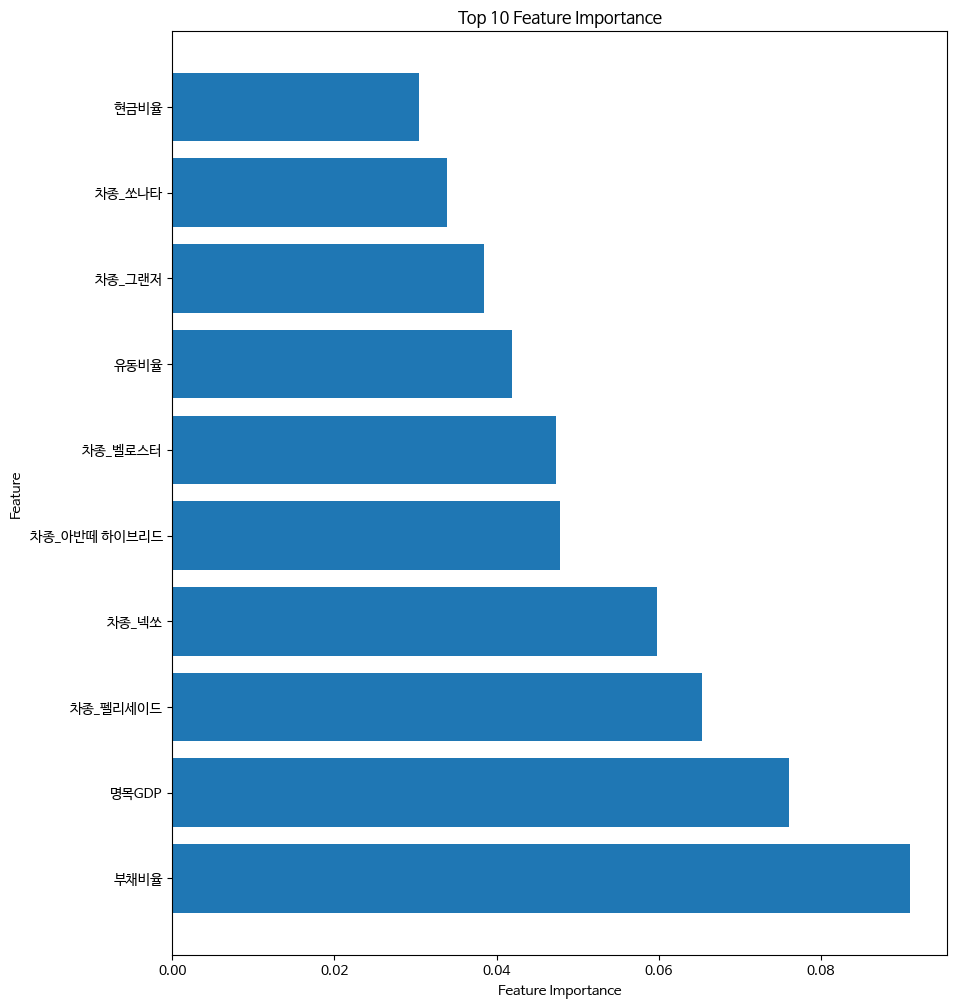

In [ ]:
# 피처 중요도 확인
feature_importances = xgb_sk.feature_importances_

# 피처 중요도를 데이터프레임에 저장 (예시로 X_train의 컬럼명을 사용)
feature_importance_df = pd.DataFrame({'Feature': feature_en.columns, 'Importance': feature_importances})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(feature_importance_df[:15])

# 시각화 (예시로 상위 10개 피처만 표시)
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()

lighgbm

In [ ]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test, Y_test)]
lgbm_wrapper.fit(X_train, Y_train, eval_metric='logloss', eval_set=evals)
y_pred = lgbm_wrapper.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
sk_pred_proba= lgbm_wrapper.predict_proba(X_test)[:,1]

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('roc auc score = ', roc_auc_score(Y_test, sk_pred_proba))

confusion matrix = 
 [[76 20]
 [19 52]]
accuracy =  0.7664670658682635
precision =  0.7222222222222222
recall =  0.7323943661971831
f1 score =  0.7272727272727272
roc auc score =  0.9310446009389671


         Feature  Importance
18            가격        2071
17           판매량        1429
22  차량별 영업이익 기여도        1193
19           판매액         997
23   차량별 판관비 기여도         840
20   차량별 매출액 기여도         765
21  차량별 매출원가 기여도         546
10          부채비율         380
14      부채총계대매출액         237
5           유동비율         229
15         명목GDP         213
16        GDP성장률         205
13         순운전자본         183
9    세전이익대비_비용비율         170
12          현금비율         160


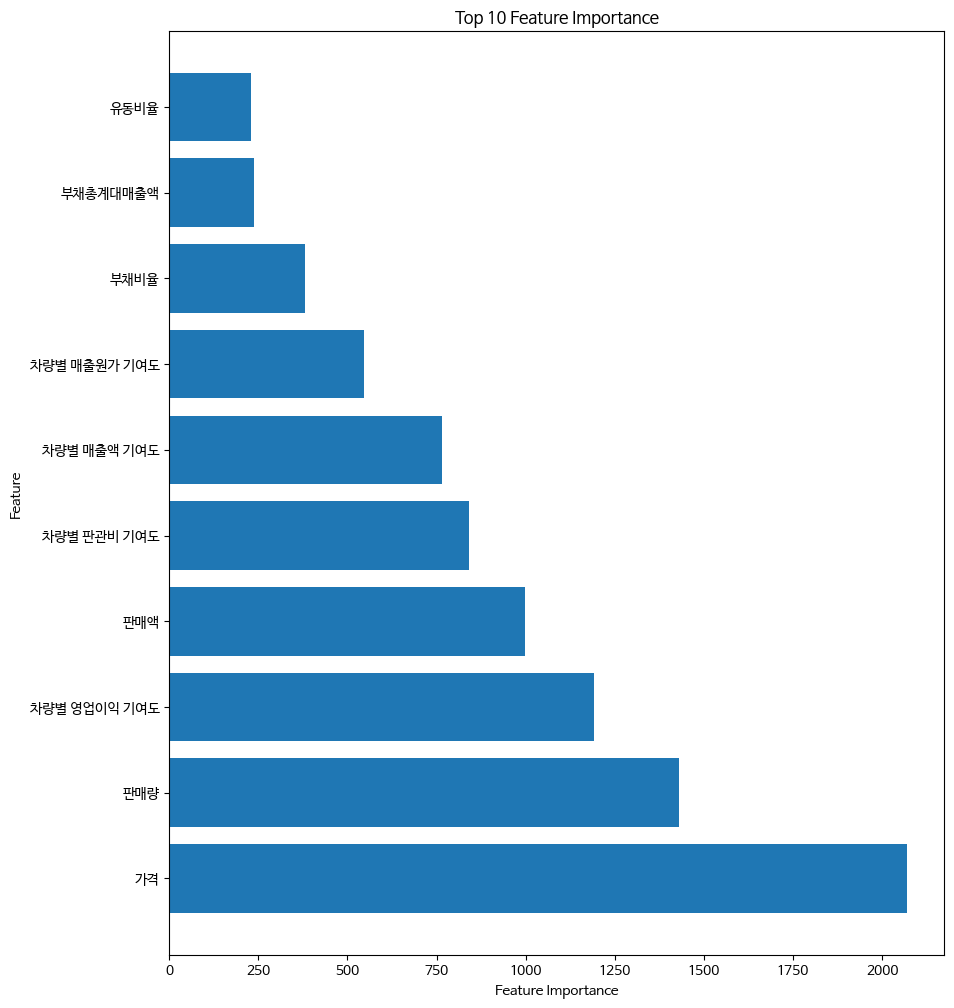

In [ ]:
# 피처 중요도 확인
feature_importances = lgbm_wrapper.feature_importances_

# 피처 중요도를 데이터프레임에 저장 (예시로 X_train의 컬럼명을 사용)
feature_importance_df = pd.DataFrame({'Feature': feature_en.columns, 'Importance': feature_importances})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(feature_importance_df[:15])

# 시각화 (예시로 상위 10개 피처만 표시)
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()

비재무 데이터만

In [ ]:
df2 = df[[ '자연증가건수(명)',
       '사망자수(명)', '일반혼인율(남편)', '일반혼인율(아내)', '출생아수(명)', '합계출산율', '혼인건수(건)',
       '기준금리', '20-29세 인구(명)', '20-29세 경제활동인구 (천명)', '20-29세 경제활동참가율 (%)',
       '20-29세 고용률 (%)', '20-29세 비경제활동인구 (천명)', '20-29세 실업률 (%)',
       '20-29세 실업자 (천명)', '20-29세 취업자 (천명)', '30-39세 인구(명)',
       '30-39세 경제활동인구 (천명)', '30-39세 경제활동참가율 (%)', '30-39세 고용률 (%)',
       '30-39세 비경제활동인구 (천명)', '30-39세 실업률 (%)', '30-39세 실업자 (천명)',
       '30-39세 취업자 (천명)', '40-49세 인구(명)', '40-49세 경제활동인구 (천명)',
       '40-49세 경제활동참가율 (%)', '40-49세 고용률 (%)', '40-49세 비경제활동인구 (천명)',
       '40-49세 실업률 (%)', '40-49세 실업자 (천명)', '40-49세 취업자 (천명)', '50-59세 인구(명)',
       '50-59세 경제활동인구 (천명)', '50-59세 경제활동참가율 (%)', '50-59세 고용률 (%)',
       '50-59세 비경제활동인구 (천명)', '50-59세 실업률 (%)', '50-59세 실업자 (천명)',
       '50-59세 취업자 (천명)', '60세이상 인구(명)', '60세이상 경제활동인구 (천명)',
       '60세이상 경제활동참가율 (%)', '60세이상 고용률 (%)', '60세이상 비경제활동인구 (천명)',
       '60세이상 실업률 (%)', '60세이상 실업자 (천명)', '60세이상 취업자 (천명)', '리뷰', '평점 평균',
       '주행성능평균', '가격평균', '거주성평균', '품질평균', '디자인평균', '평균 연비', '공감평균', '비공감평균',
       'positive평균', 'neutral평균', 'negative평균', 'target','차종']].copy()

In [ ]:
target = df2['target']
feature = df2.drop(['target','리뷰'],axis=1)#우선 필요없다고 판단되는 칼럼삭제, 마감일의 경우 다른 분석에는 필요할지 논의 필

In [ ]:
feature_en = pd.get_dummies(feature)

In [ ]:
import sklearn
from sklearn.preprocessing import *

feature_sc=StandardScaler().fit_transform(feature_en)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(feature_sc, target, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
score1 = model.predict_proba(X_test)[:, 1]

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('roc auc score = ', roc_auc_score(Y_test, score1))

confusion matrix = 
 [[80 16]
 [15 56]]
accuracy =  0.8143712574850299
precision =  0.7777777777777778
recall =  0.7887323943661971
f1 score =  0.7832167832167832
roc auc score =  0.8950997652582159


In [ ]:
# Calculate the weights of each feature
weights = model.coef_[0] * (X_train.max(axis=0) - X_train.min(axis=0)) / X_train.std(axis=0)

# Sort the weights in descending order
sorted_idx = weights.argsort()[::-1]
for i in range(15):
    print(f"{feature_en.columns[i]}: {weights[i]}")

자연증가건수(명): -0.9971413273011854
사망자수(명): 2.082931875109186
일반혼인율(남편): -0.09157950303848873
일반혼인율(아내): -0.4591581757282502
출생아수(명): -0.3927198138430717
합계출산율: -0.6541566316891766
혼인건수(건): -0.11233755093460629
기준금리: 0.03935147493536655
20-29세 인구(명): 0.10647880063128483
20-29세 경제활동인구 (천명): 1.0957311403464098
20-29세 경제활동참가율 (%): 0.7726791041356492
20-29세 고용률 (%): 0.011491996178168146
20-29세 비경제활동인구 (천명): -0.4797196687566028
20-29세 실업률 (%): 0.6434266737546952
20-29세 실업자 (천명): 0.4565539877991388


랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, Y_train)
Y_pred = RF_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
score1 = RF_clf.predict_proba(X_test)[:, 1]

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('roc auc score = ', roc_auc_score(Y_test, score1))

confusion matrix = 
 [[90  6]
 [11 60]]
accuracy =  0.8982035928143712
precision =  0.9090909090909091
recall =  0.8450704225352113
f1 score =  0.8759124087591241
roc auc score =  0.9472564553990611


In [ ]:
ser = pd.Series(RF_clf.feature_importances_, index=feature_en.columns)

# 내림차순 정렬을 이용한다
top15 = ser.sort_values(ascending=False)[:15]
print(top15)

60세이상 경제활동인구 (천명)     0.034655
negative평균            0.032633
60세이상 비경제활동인구 (천명)    0.031797
30-39세 인구(명)          0.030375
가격평균                  0.029441
60세이상 인구(명)           0.029079
positive평균            0.028622
60세이상 취업자 (천명)        0.026686
차종_그랜저 하이브리드          0.026446
차종_펠리세이드              0.025863
공감평균                  0.025471
주행성능평균                0.025054
20-29세 실업자 (천명)       0.024944
30-39세 경제활동인구 (천명)    0.024660
품질평균                  0.024103
dtype: float64


xgboost

In [ ]:
from xgboost import XGBClassifier

xgb_sk = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_sk.fit(X_train, Y_train)
sk_pred = xgb_sk.predict(X_test)
sk_pred_proba= xgb_sk.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc


print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('roc auc score = ', roc_auc_score(Y_test, sk_pred_proba))

confusion matrix = 
 [[90  6]
 [11 60]]
accuracy =  0.8982035928143712
precision =  0.9090909090909091
recall =  0.8450704225352113
f1 score =  0.8759124087591241
roc auc score =  0.9460093896713615


                Feature  Importance
44   60세이상 비경제활동인구 (천명)    0.203296
16         30-39세 인구(명)    0.083147
65                차종_넥쏘    0.054870
11       20-29세 고용률 (%)    0.048108
38      50-59세 실업자 (천명)    0.034351
67              차종_벨로스터    0.026654
73               차종_쏘나타    0.026139
57           positive평균    0.022947
54                평균 연비    0.022233
39      50-59세 취업자 (천명)    0.020421
7                  기준금리    0.016478
50                 가격평균    0.016068
64         차종_그랜저 하이브리드    0.015718
55                 공감평균    0.015077
20  30-39세 비경제활동인구 (천명)    0.015064


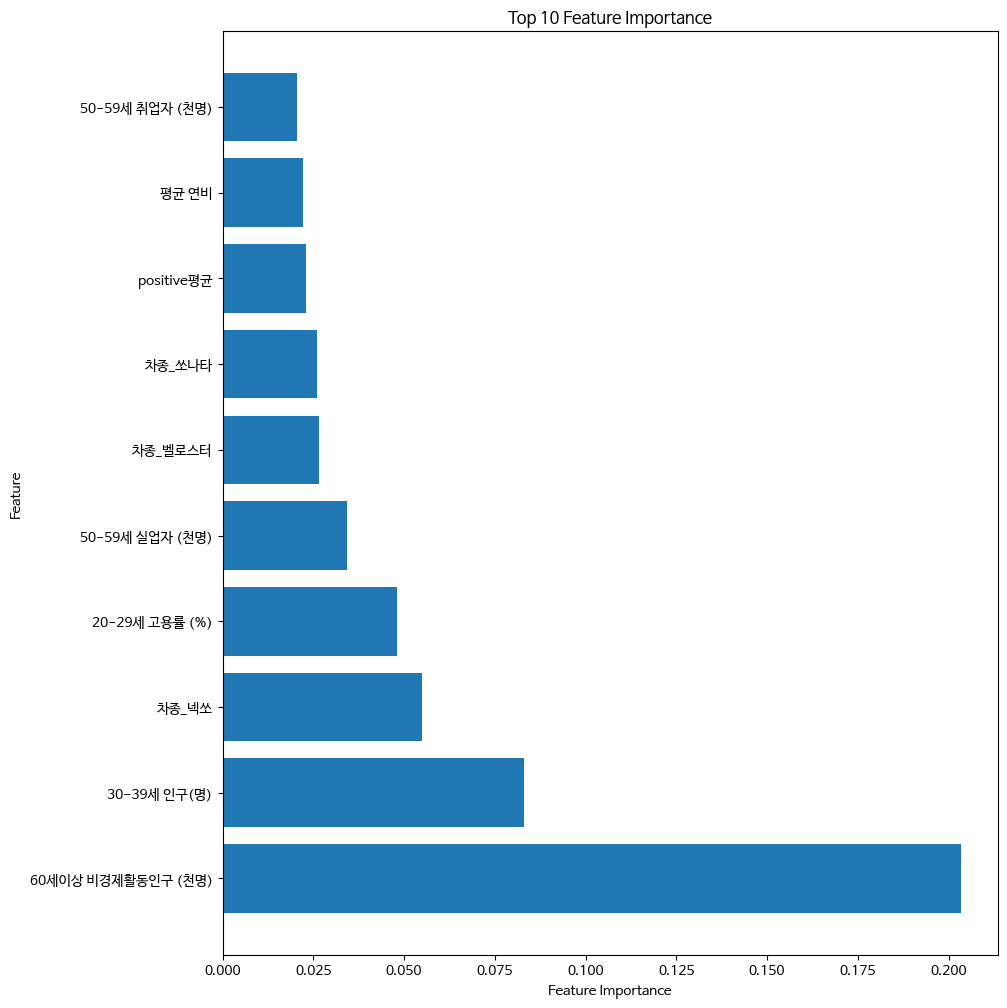

In [ ]:
# 피처 중요도 확인
feature_importances = xgb_sk.feature_importances_

# 피처 중요도를 데이터프레임에 저장 (예시로 X_train의 컬럼명을 사용)
feature_importance_df = pd.DataFrame({'Feature': feature_en.columns, 'Importance': feature_importances})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(feature_importance_df[:15])

# 시각화 (예시로 상위 10개 피처만 표시)
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()

lgbm

In [ ]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test, Y_test)]
lgbm_wrapper.fit(X_train, Y_train, eval_metric='logloss', eval_set=evals)
y_pred = lgbm_wrapper.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
sk_pred_proba= lgbm_wrapper.predict_proba(X_test)[:,1]

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('roc auc score = ', roc_auc_score(Y_test, sk_pred_proba))

confusion matrix = 
 [[90  6]
 [11 60]]
accuracy =  0.8982035928143712
precision =  0.9090909090909091
recall =  0.8450704225352113
f1 score =  0.8759124087591241
roc auc score =  0.970730633802817


                Feature  Importance
0             자연증가건수(명)        1267
1               사망자수(명)         644
8          20-29세 인구(명)         499
2             일반혼인율(남편)         485
7                  기준금리         348
16         30-39세 인구(명)         331
9    20-29세 경제활동인구 (천명)         331
64         차종_그랜저 하이브리드         240
89          차종_제네시스 G80         219
23      30-39세 취업자 (천명)         219
12  20-29세 비경제활동인구 (천명)         198
58            neutral평균         183
24         40-49세 인구(명)         169
54                평균 연비         166
4               출생아수(명)         159


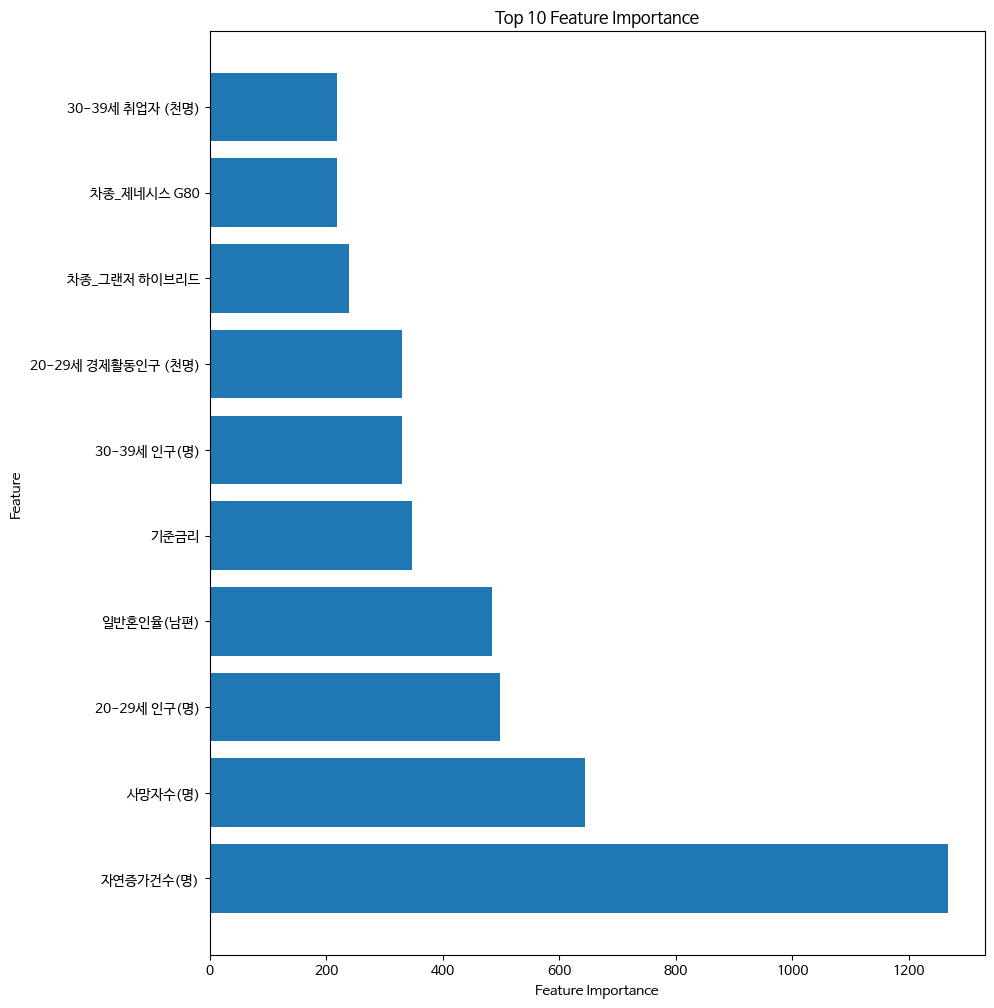

In [ ]:
# 피처 중요도 확인
feature_importances = lgbm_wrapper.feature_importances_

# 피처 중요도를 데이터프레임에 저장 (예시로 X_train의 컬럼명을 사용)
feature_importance_df = pd.DataFrame({'Feature': feature_en.columns, 'Importance': feature_importances})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(feature_importance_df[:15])

# 시각화 (예시로 상위 10개 피처만 표시)
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()

재무데이터, 비재무 데이터 합

In [ ]:
target = df['target']
feature = df.drop(['target','마감일','Model','리뷰','year','생산량(천대)', '내수(천대)', '수출(억불)',
       '수입(억불)','대기기간'],axis=1)#우선 필요없다고 판단되는 칼럼삭제, 마감일의 경우 다른 분석에는 필요할지 논의 필

In [ ]:
feature['명목GDP'] = feature['명목GDP'].str.replace(',', '').astype(float)

In [ ]:
feature_en = pd.get_dummies(feature)

In [ ]:
import sklearn
from sklearn.preprocessing import *

feature_sc=StandardScaler().fit_transform(feature_en)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(feature_sc, target, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
score1 = model.predict_proba(X_test)[:, 1]

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('roc auc score = ', roc_auc_score(Y_test, score1))

confusion matrix = 
 [[78 18]
 [13 58]]
accuracy =  0.8143712574850299
precision =  0.7631578947368421
recall =  0.8169014084507042
f1 score =  0.7891156462585034
roc auc score =  0.89231220657277


In [ ]:
# Calculate the weights of each feature
weights = model.coef_[0] * (X_train.max(axis=0) - X_train.min(axis=0)) / X_train.std(axis=0)

# Sort the weights in descending order
sorted_idx = weights.argsort()[::-1]
for i in range(15):
    print(f"{feature_en.columns[i]}: {weights[i]}")

매출액: -1.7511929904502792
매출원가: -2.993318598734348
판매비와관리비: 0.5631055252089107
영업이익: 2.4315978869624675
재고자산회전율: 0.16123220345630015
유동비율: -0.4912811784537592
당좌비율: -0.1074520616972361
당기순이익: 0.40541481092283976
수요예측지표: -1.1407592651174876
세전이익대비_비용비율: -2.770585228975546
부채비율: 0.9108133881830142
자본회전율: 0.16123220345631015
현금비율: -0.12849740602986
순운전자본: -0.6348832511715884
부채총계대매출액: -0.07997346659175397


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, Y_train)
Y_pred = RF_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
score1 = RF_clf.predict_proba(X_test)[:, 1]

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('roc auc score = ', roc_auc_score(Y_test, score1))

confusion matrix = 
 [[87  9]
 [12 59]]
accuracy =  0.874251497005988
precision =  0.8676470588235294
recall =  0.8309859154929577
f1 score =  0.8489208633093526
roc auc score =  0.9411678403755868


In [ ]:
ser = pd.Series(RF_clf.feature_importances_, index=feature_en.columns)

# 내림차순 정렬을 이용한다
top15 = ser.sort_values(ascending=False)[:15]
print(top15)

30-39세 인구(명)          0.048798
부채비율                  0.037504
가격                    0.034972
판매량                   0.032872
차량별 매출액 기여도           0.031956
차량별 판관비 기여도           0.031811
판매액                   0.030449
차량별 매출원가 기여도          0.030350
60세이상 비경제활동인구 (천명)    0.029435
차량별 영업이익 기여도          0.028277
negative평균            0.023347
positive평균            0.022663
가격평균                  0.020519
평균 연비                 0.020506
공감평균                  0.020268
dtype: float64


In [ ]:
from xgboost import XGBClassifier

xgb_sk = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_sk.fit(X_train, Y_train)
sk_pred = xgb_sk.predict(X_test)
sk_pred_proba= xgb_sk.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc


print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('roc auc score = ', roc_auc_score(Y_test, sk_pred_proba))

confusion matrix = 
 [[87  9]
 [12 59]]
accuracy =  0.874251497005988
precision =  0.8676470588235294
recall =  0.8309859154929577
f1 score =  0.8489208633093526
roc auc score =  0.9308978873239435


               Feature  Importance
10                부채비율    0.073034
15               명목GDP    0.064170
5                 유동비율    0.063245
17                  분기    0.051261
90               차종_넥쏘    0.028632
62      50-59세 실업률 (%)    0.026231
92             차종_벨로스터    0.025661
82          positive평균    0.021200
16              GDP성장률    0.021148
77                품질평균    0.020168
73               평점 평균    0.019491
43  30-39세 경제활동참가율 (%)    0.019480
79               평균 연비    0.019012
83           neutral평균    0.018722
75                가격평균    0.015278


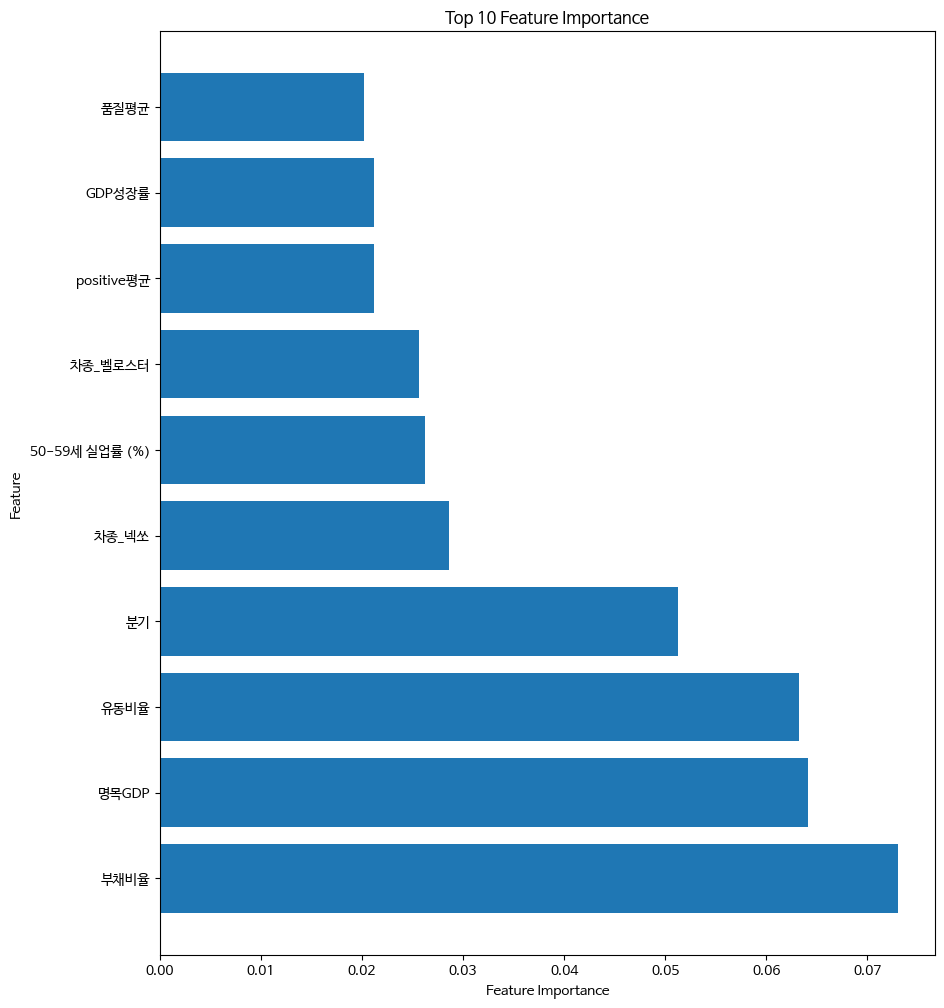

In [ ]:
# 피처 중요도 확인
feature_importances = xgb_sk.feature_importances_

# 피처 중요도를 데이터프레임에 저장 (예시로 X_train의 컬럼명을 사용)
feature_importance_df = pd.DataFrame({'Feature': feature_en.columns, 'Importance': feature_importances})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(feature_importance_df[:15])

# 시각화 (예시로 상위 10개 피처만 표시)
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()

In [ ]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(X_test, Y_test)]
lgbm_wrapper.fit(X_train, Y_train, eval_metric='logloss', eval_set=evals)
y_pred = lgbm_wrapper.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc
sk_pred_proba= lgbm_wrapper.predict_proba(X_test)[:,1]

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('roc auc score = ', roc_auc_score(Y_test, sk_pred_proba))

confusion matrix = 
 [[87  9]
 [12 59]]
accuracy =  0.874251497005988
precision =  0.8676470588235294
recall =  0.8309859154929577
f1 score =  0.8489208633093526
roc auc score =  0.9678697183098591


         Feature  Importance
19            가격        1007
18           판매량         799
23  차량별 영업이익 기여도         794
20           판매액         762
21   차량별 매출액 기여도         595
24   차량별 판관비 기여도         549
22  차량별 매출원가 기여도         330
75          가격평균         267
10          부채비율         212
84    negative평균         191
79         평균 연비         171
74        주행성능평균         150
83     neutral평균         146
33  20-29세 인구(명)         138
14      부채총계대매출액         125


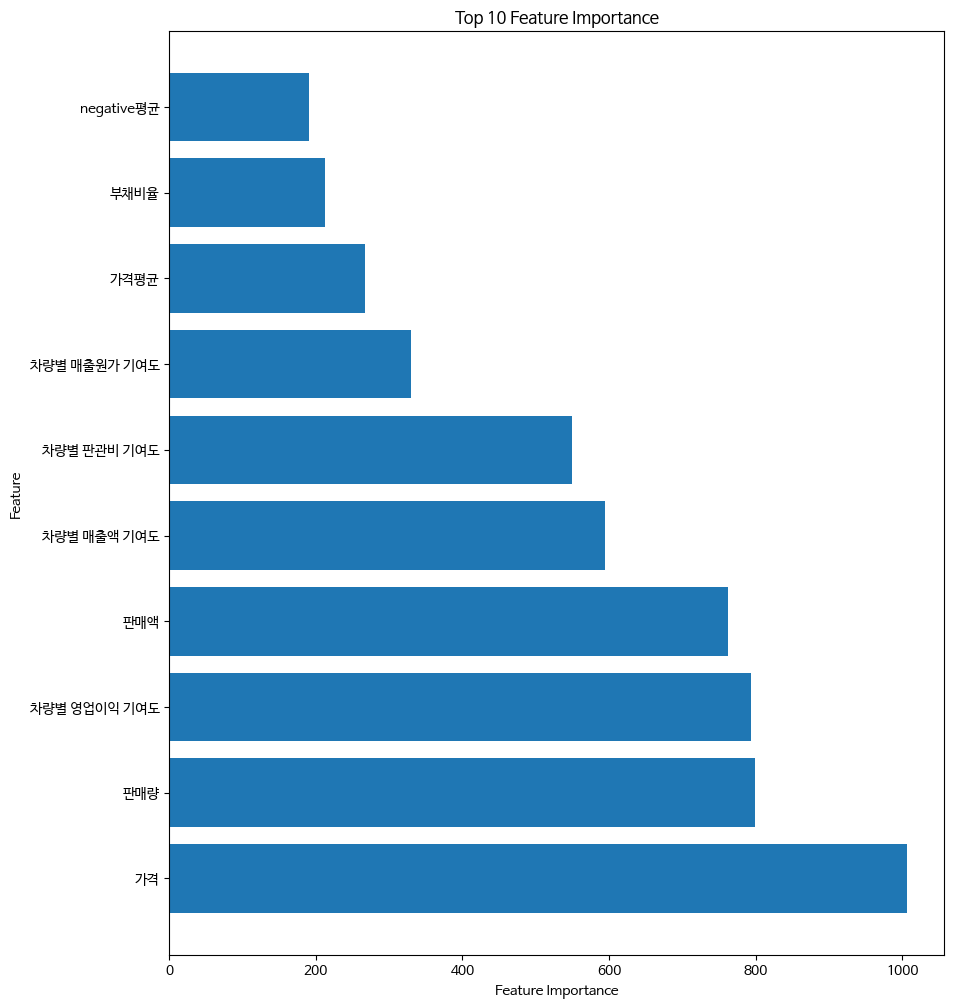

In [ ]:
# 피처 중요도 확인
feature_importances = lgbm_wrapper.feature_importances_

# 피처 중요도를 데이터프레임에 저장 (예시로 X_train의 컬럼명을 사용)
feature_importance_df = pd.DataFrame({'Feature': feature_en.columns, 'Importance': feature_importances})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(feature_importance_df[:15])

# 시각화 (예시로 상위 10개 피처만 표시)
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance')
plt.show()